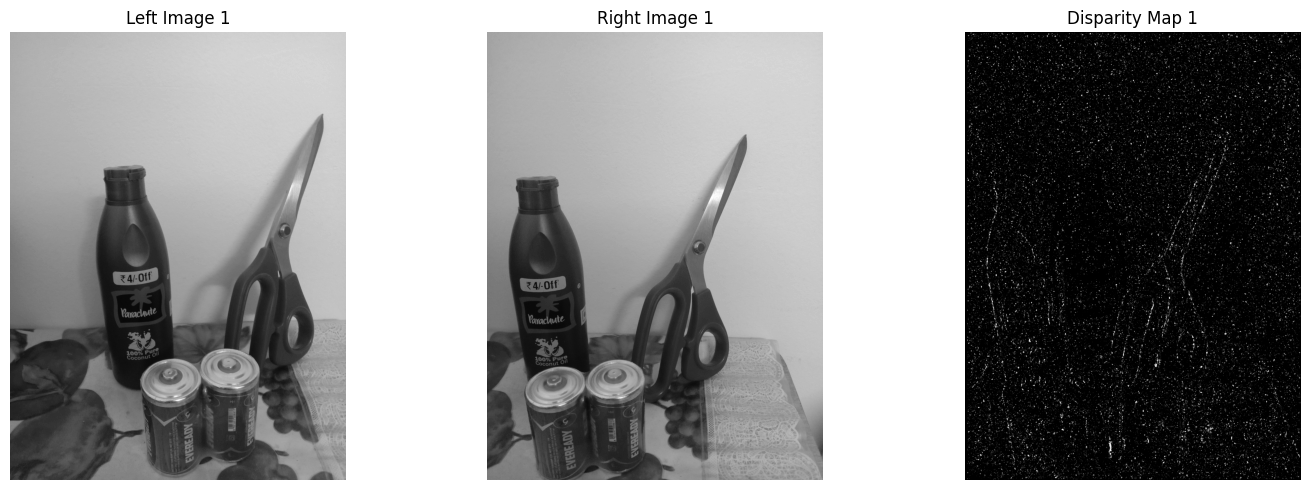

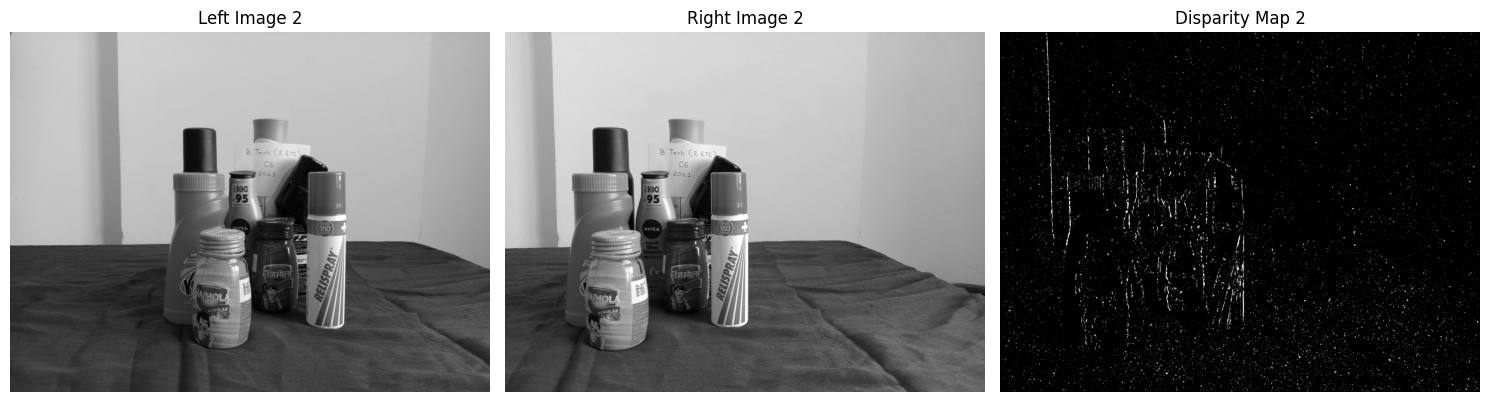

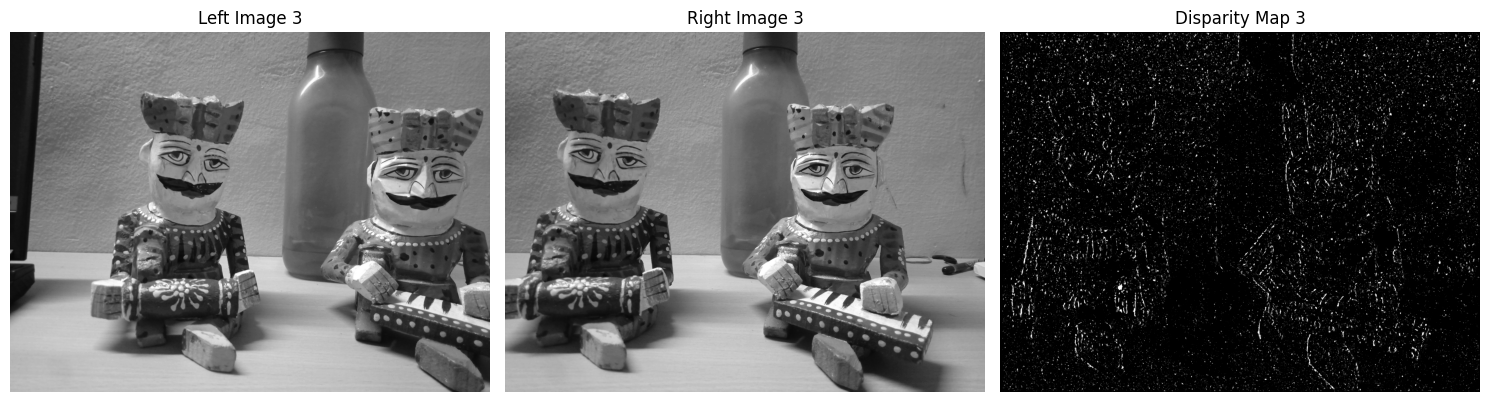

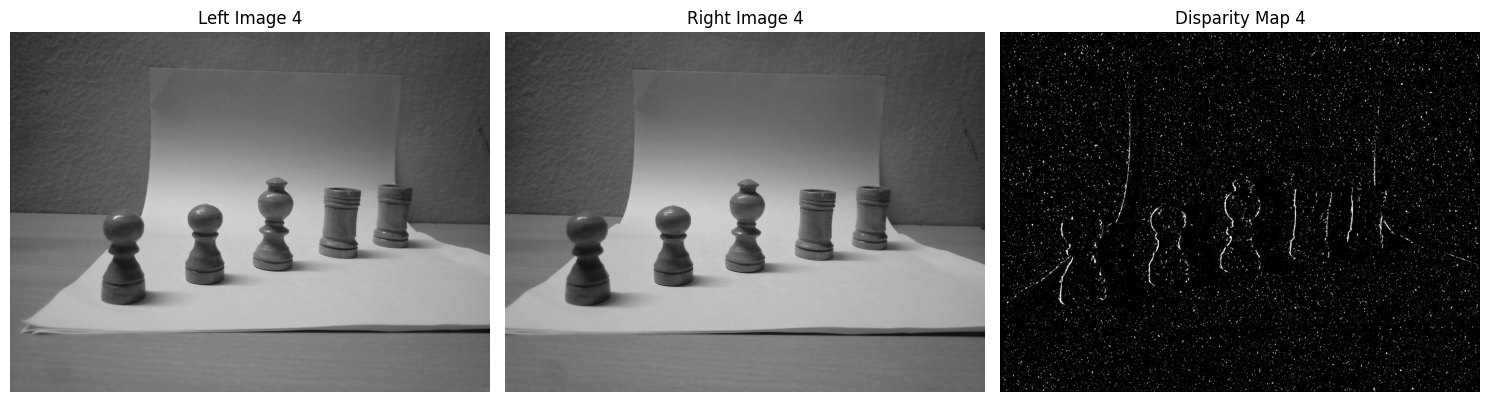

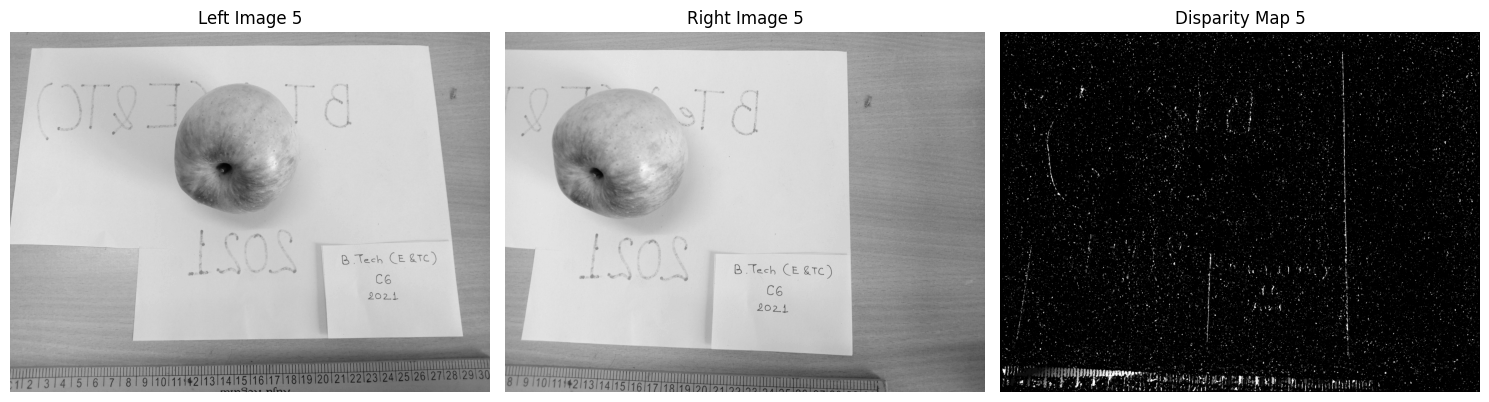

In [8]:
import os
import cv2 as cv
from matplotlib import pyplot as plt

# Percorso della cartella contenente le immagini
image_dir = './stereo-images'

# Lista ordinata dei file nella directory
image_files = sorted(os.listdir(image_dir))

# Filtra solo i file immagine (opzionale, nel caso ci siano altri tipi di file)
image_files = [f for f in image_files if f.endswith(('.jpg', '.png', '.jpeg'))]

# Lista per coppie di immagini (assumendo che siano alternate left/right)
image_pairs = [(image_files[i], image_files[i + 1]) for i in range(0, len(image_files), 2)]

# Iterazione su ogni coppia di immagini
for idx, (left_file, right_file) in enumerate(image_pairs):
    # Caricamento delle immagini in scala di grigi
    imgL = cv.imread(os.path.join(image_dir, left_file), cv.IMREAD_GRAYSCALE)
    imgR = cv.imread(os.path.join(image_dir, right_file), cv.IMREAD_GRAYSCALE)

    # Calcolo della mappa di disparità
    stereo = cv.StereoBM.create(numDisparities=16, blockSize=15)
    disparity = stereo.compute(imgL, imgR)

    # Visualizzazione
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    axes[0].imshow(imgL, cmap='gray')
    axes[0].set_title(f"Left Image {idx + 1}")
    axes[0].axis('off')

    axes[1].imshow(imgR, cmap='gray')
    axes[1].set_title(f"Right Image {idx + 1}")
    axes[1].axis('off')

    axes[2].imshow(disparity, cmap='gray')
    axes[2].set_title(f"Disparity Map {idx + 1}")
    axes[2].axis('off')

    plt.tight_layout()
    plt.show()